# Machine Learning Capstone Project

Fist we have to import the dependecies needed for the project as specified by the [README](https://github.com/jeyvison/machine_learning_project/blob/master/README.md) file

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from IPython.display import display # Allows the use of display() for DataFrames
from sklearn.decomposition import PCA

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

print 'Dependencies succefully imported'

Dependencies succefully imported


In [2]:
#Loading the trainning data
data = pd.read_csv('data.csv')

#Removing unnecessary id column
data.drop(['id','Unnamed: 32'],1,inplace=True)

X = data.drop('diagnosis',1)
y = data.drop(X,1)

print 'Dataset succefully loaded. {0} points and {1} features'.format(*X.shape)

Dataset succefully loaded. 569 points and 30 features


Since we are in a high dimensional feature space we must check which features have more importance on this dataset so we can performe a feature reduction.

In [3]:
#First, we scale the dataset wing the log function
X = np.log(X)

#We had some 0 values in our dataset that were turned to 'inf'
#Now we have to change it back
X[np.isinf(X)] = 0.0

display(X.describe())

/home/jeyvison/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,2.619131,2.935269,4.489174,6.363185,-2.350210,-2.380518,-2.777267,-3.237934,-1.719430,-2.773718,...,2.749578,3.217009,4.631289,6.615811,-2.037005,-1.550372,-1.592779,-2.266666,-1.258202,-2.497773
std,0.238189,0.220789,0.251084,0.483139,0.145572,0.494459,1.145741,0.981372,0.148229,0.106867,...,0.276438,0.240730,0.290892,0.554917,0.173086,0.617256,1.001406,0.723568,0.200010,0.195784
min,1.943192,2.273156,3.779405,4.966335,-2.944469,-3.943514,-7.275925,-6.291489,-2.244316,-2.996533,...,2.070653,2.486572,3.920190,5.221436,-2.642684,-3.601235,-6.295276,-4.736190,-1.854699,-2.899695
25%,2.459589,2.783158,4.319752,6.040969,-2.449115,-2.734600,-3.462222,-3.859905,-1.820776,-2.852498,...,2.565718,3.048325,4.432125,6.244749,-2.149006,-1.915963,-2.085862,-2.703660,-1.384696,-2.638617
50%,2.593013,2.935982,4.457134,6.311916,-2.344762,-2.379142,-2.708450,-3.296837,-1.719253,-2.788068,...,2.706048,3.235143,4.581492,6.531606,-2.030270,-1.551641,-1.421714,-2.256656,-1.265139,-2.525229
75%,2.758743,3.081910,4.645352,6.662749,-2.250942,-2.037149,-1.976885,-2.543765,-1.631172,-2.716284,...,2.933325,3.391820,4.831509,6.988413,-1.924149,-1.081460,-0.922309,-1.767262,-1.146018,-2.385098
max,3.336125,3.670715,5.239098,7.824446,-1.811554,-1.063052,0.000000,0.000000,-1.190728,-2.328518,...,3.584629,3.902780,5.526249,8.355615,-1.502379,0.056380,0.224742,0.000000,-0.409774,-1.572624


Now that we scaled the data lets analyze it

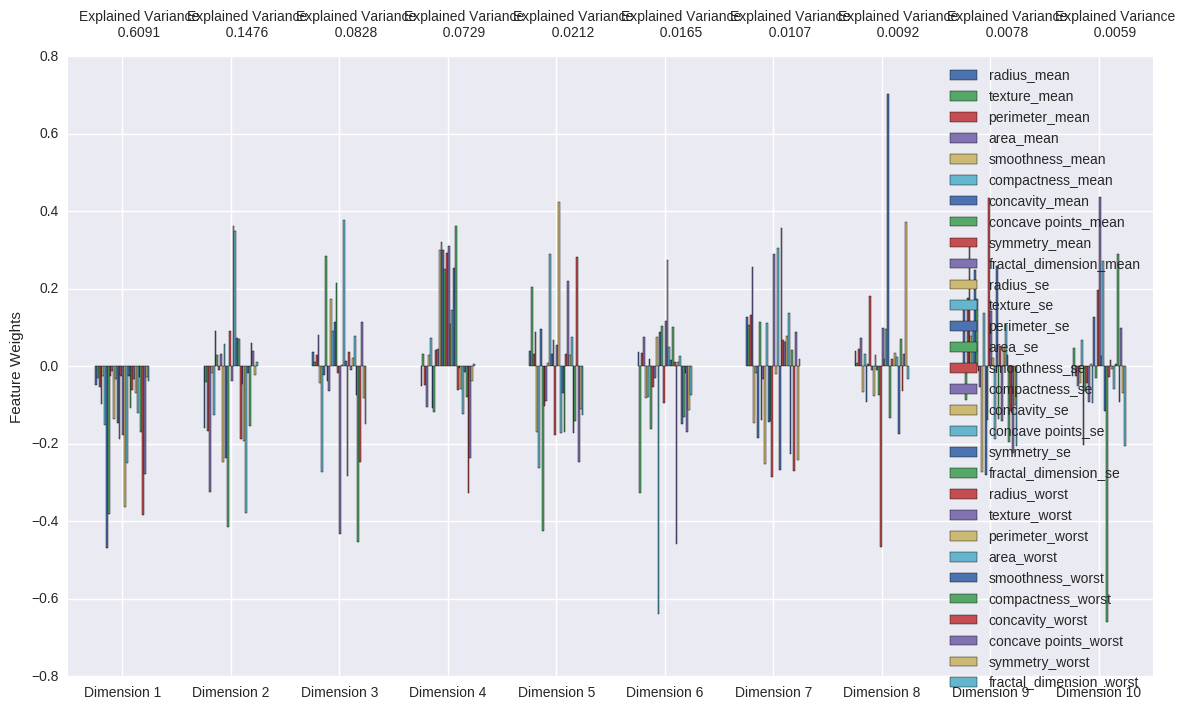

In [11]:
from sklearn.decomposition import PCA

pca = PCA(n_components=9)
pca.fit(X)

pca_results = vs.pca_results(X, pca)
    

Now that we have

In [16]:
pca = PCA(n_components=9)

reduced_data = pca.fit_transform(X)

new_X = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2','Dimension 3', 'Dimension 4','Dimension 5', 'Dimension 6','Dimension 7', 'Dimension 8','Dimension 9'])

display(new_X.describe())

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6,Dimension 7,Dimension 8,Dimension 9
count,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02
mean,-1.170710e-16,-8.116921e-17,-1.857526e-16,-3.346279e-16,-6.499878e-17,-1.000103e-16,1.207538e-16,-5.581602e-16,-3.092625e-16
std,2.400734e+00,1.181718e+00,8.851654e-01,8.303710e-01,4.478890e-01,3.951450e-01,3.183778e-01,2.948029e-01,2.718291e-01
min,-5.997121e+00,-3.123688e+00,-2.446695e+00,-2.236288e+00,-1.270932e+00,-1.101634e+00,-8.906741e-01,-9.124285e-01,-8.690625e-01
25%,-1.763570e+00,-6.948109e-01,-5.423935e-01,-5.892989e-01,-2.705810e-01,-2.756579e-01,-2.337656e-01,-1.885685e-01,-1.860808e-01
50%,3.468474e-02,2.258470e-02,-4.418692e-02,-8.877381e-02,-2.932561e-03,-3.757462e-03,2.978919e-03,-8.594380e-03,-1.048567e-02
75%,1.565622e+00,5.548393e-01,4.507875e-01,5.310064e-01,2.931515e-01,2.403129e-01,2.074522e-01,1.733298e-01,1.658917e-01
max,7.808809e+00,5.800624e+00,4.422743e+00,2.423414e+00,1.671931e+00,1.299168e+00,1.066157e+00,1.138466e+00,1.058201e+00


Now we reduced our data we must find the best score for the possible component numbers.

In [1]:
def train_classifier(clf, X_train, y_train):
    ''' Fits a classifier to the training data. '''
    
    # Start the clock, train the classifier, then stop the clock
    start = time()
    clf.fit(X_train, y_train)
    end = time()
    
    # Print the results
    print "Trained model in {:.4f} seconds".format(end - start)

    
def predict_labels(clf, features, target):
    ''' Makes predictions using a fit classifier based on F1 score. '''
    
    # Start the clock, make predictions, then stop the clock
    start = time()
    y_pred = clf.predict(features)
    end = time()
    
    # Print and return results
    print "Made predictions in {:.4f} seconds.".format(end - start)
    return f1_score(target.values, y_pred, pos_label='yes')


def train_predict(clf, X_train, y_train, X_test, y_test):
    ''' Train and predict using a classifer based on F1 score. '''
    
    # Indicate the classifier and the training set size
    print "Training a {} using a training set size of {}. . .".format(clf.__class__.__name__, len(X_train))
    
    # Train the classifier
    train_classifier(clf, X_train, y_train)
    
    # Print the results of prediction for both training and testing
    print "F1 score for training set: {:.4f}.".format(predict_labels(clf, X_train, y_train))
    print "F1 score for test set: {:.4f}.".format(predict_labels(clf, X_test, y_test))

In [ ]:
clf_A = SVC(random_state=35)


for clf in [clf_A]:
   for size in [100, 200, 300]:
       train_predict(clf, X_train[:size], y_train[:size], X_test, y_test)
        